# 3
## f
### i

In [1]:
import numpy as np
import scipy
from scipy.optimize import minimize
import matplotlib.pyplot as plt
def beta_ordinary(X: np.ndarray, Y: np.ndarray)-> np.ndarray:
    """
    Compute the ordinary least squares estimator.
    
    Parameters:
    X : np.ndarray
        Input matrix of shape (samples, features + 1) or (n,p).
    Y : np.ndarray
        Output vector of shape (samples,) or (n,).
    Returns:
    beta : np.ndarray
        Estimated coefficients vector of shape (features + 1,) or (p,).

    """
    beta = np.linalg.inv(X.T @ X) @ X.T @ Y
    return beta
np.random.seed(1)
beta = np.array([-1.5, 2.0])
input_range = np.linspace(-1, 1, 100)
X = np.vstack([np.ones(100), input_range]).T
y = X @ beta + np.random.normal(0, 0.3, 100)

def calculate_laplacian_loss(parameters, X, y):
    return np.sum(np.abs(y - X @ parameters))

epsilon = y - X @ beta
n = len(epsilon)


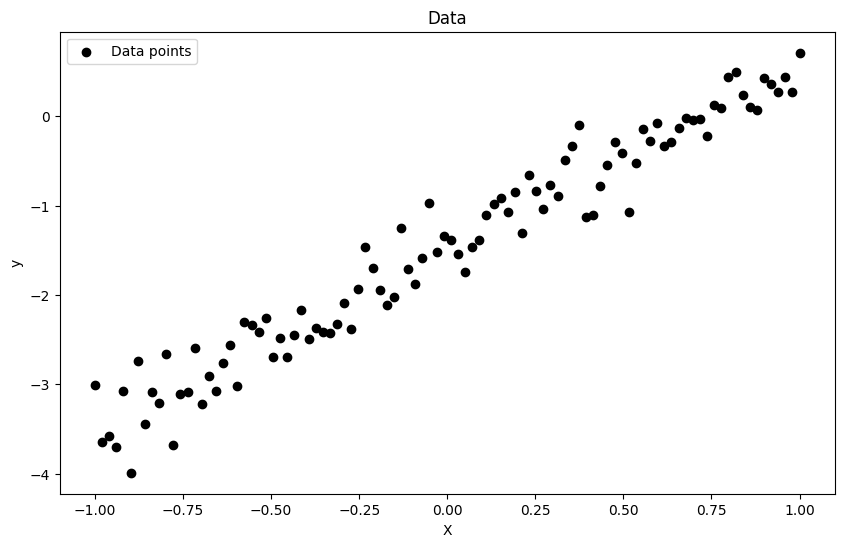

In [2]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,1], y, color='black', label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Data')
plt.legend()
plt.show()



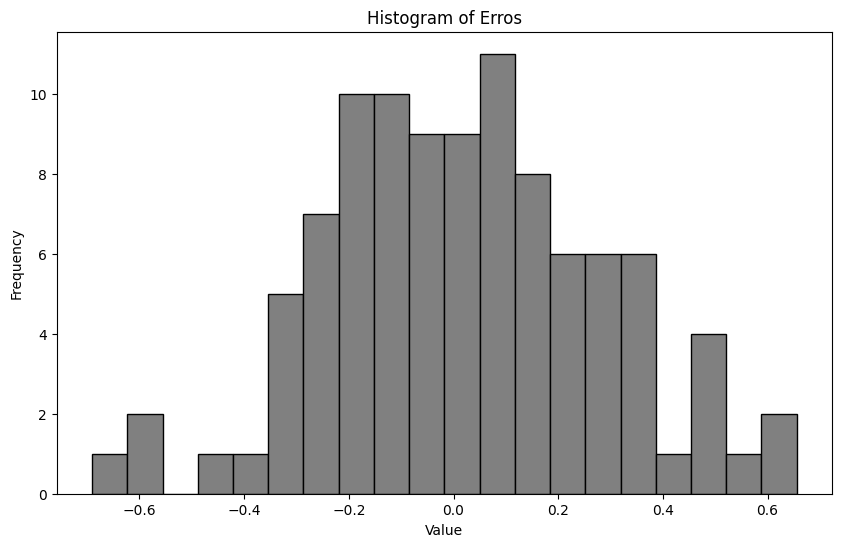

In [3]:
plt.figure(figsize=(10,6))
plt.hist(epsilon, bins=20, color='gray', edgecolor='black')
plt.xlabel('Value') 
plt.ylabel('Frequency')
plt.title('Histogram of Erros')
plt.show()


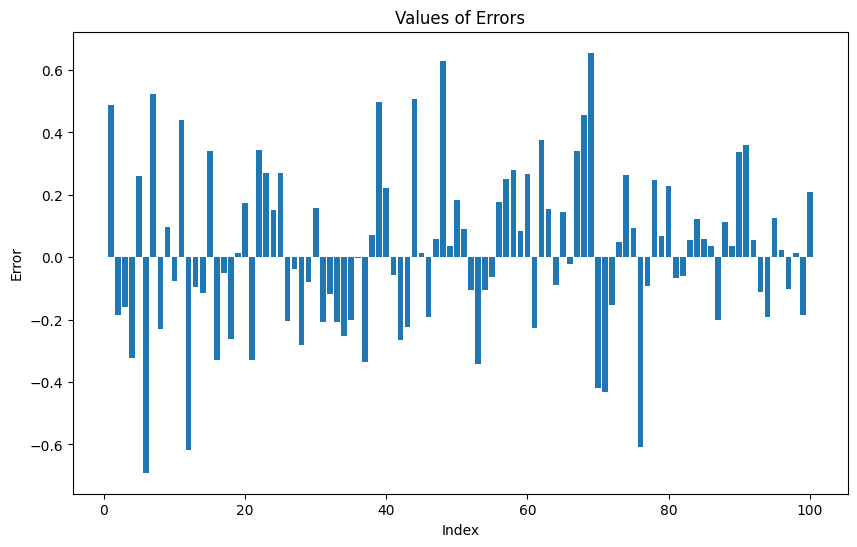

In [4]:
plt.figure(figsize=(10,6))
plt.bar(range(1, n+1), epsilon)
plt.xlabel('Index') 
plt.ylabel('Error')
plt.title('Values of Errors')
plt.show()

In [5]:
def calculate_beta_hat(X: np.ndarray, Y: np.ndarray, error_distribution: str) -> np.ndarray:
    """
    Compute the estimator beta_hat based on the specified error distribution.
    Parameters:
    X : np.ndarray
        Input matrix of shape (samples, features + 1) or (n,p).
    Y : np.ndarray
        Output vector of shape (samples,) or (n,).
    error_distribution : str
        Type of error distribution ('gaussian' or 'laplacian').
    Returns:
    beta_hat : np.ndarray
        Estimated coefficients vector of shape (features + 1,) or (p,).
    """
    
    np.random.seed(0)
    
    p = X.shape[1]
    if error_distribution == 'gaussian':
        def loss_function(beta):
            return np.sum((Y-X @ beta)**2 )
    elif error_distribution =='laplacian':
        def loss_function(beta):
            return np.sum(np.abs(Y-X @ beta))
    else: 
        raise ValueError("Unsupported error distribution") 

    beta_0 = np.random.uniform(size=p)
    beta_hat = scipy.optimize.minimize(loss_function,beta_0)
    return beta_hat['x']

beta_hat_gaussian = calculate_beta_hat(X, y, 'gaussian')
beta_hat_gaussian_old_function = beta_ordinary(X,y)
beta_hat_laplacian = calculate_beta_hat(X, y, 'laplacian')

# Print results
print("True Coefficients:", beta)
print("Coefficients (Gaussian with minimize):", beta_hat_gaussian)
print("Coefficients (Gaussian closed form):", beta_hat_gaussian_old_function)
print("Coefficients (Laplacian):", beta_hat_laplacian)

True Coefficients: [-1.5  2. ]
Coefficients (Gaussian with minimize): [-1.48182515  2.04962669]
Coefficients (Gaussian closed form): [-1.48182514  2.0496267 ]
Coefficients (Laplacian): [-1.4978794   2.08212298]


### ii

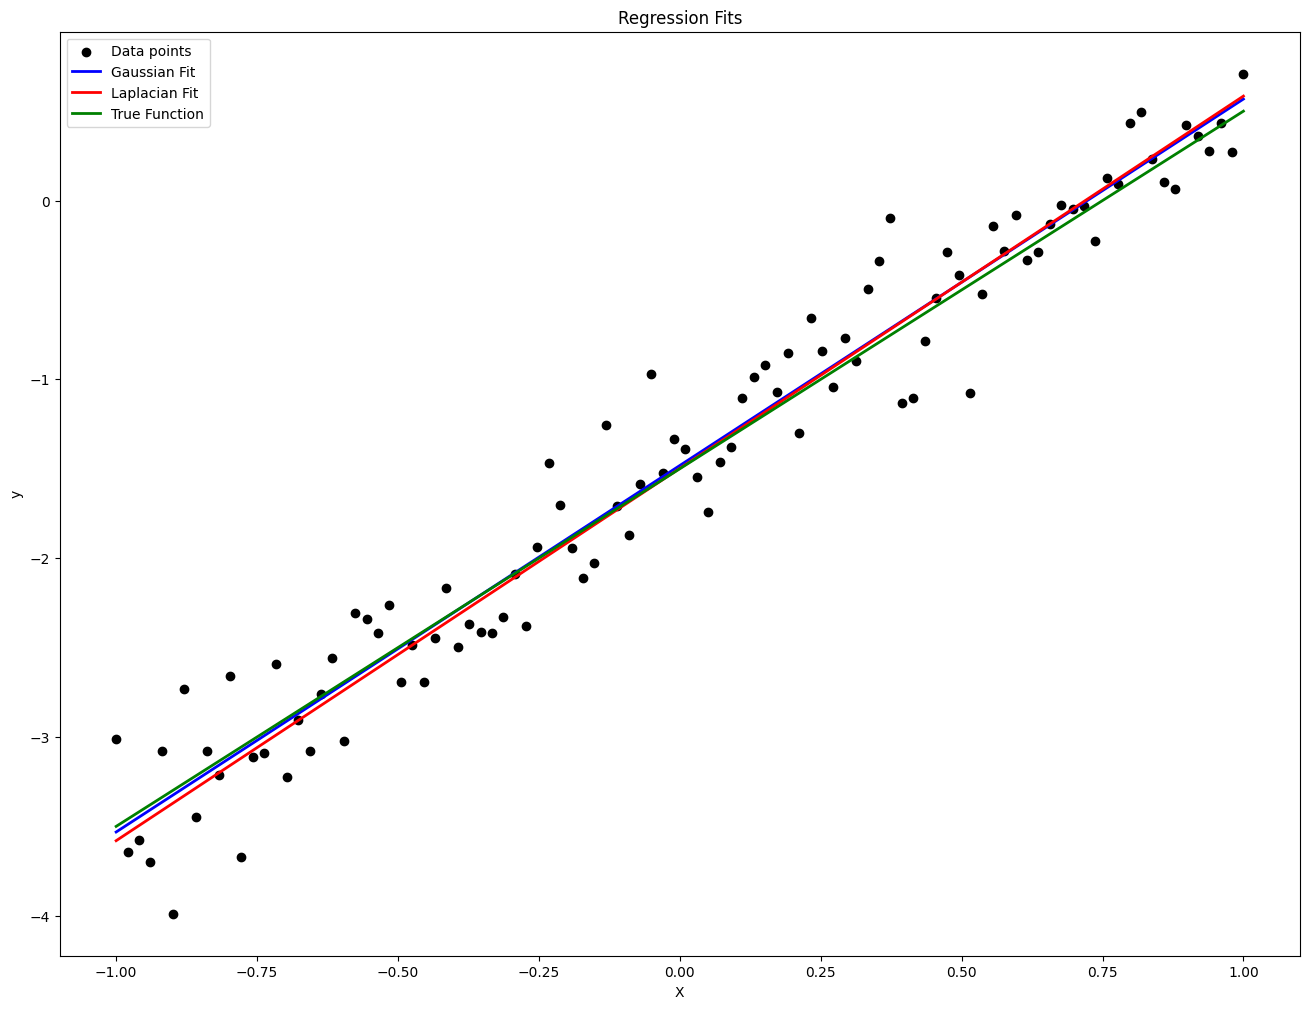

In [6]:
yhat_gaussina = X @ beta_hat_gaussian
yhat_laplace = X @ beta_hat_laplacian
yhat_real = X @ beta

plt.figure(figsize=(16,12))
plt.scatter(X[:,1], y, color='black', label='Data points')
plt.plot(X[:,1], yhat_gaussina, color='blue', label='Gaussian Fit', linewidth=2)
plt.plot(X[:,1], yhat_laplace, color='red', label='Laplacian Fit', linewidth=2)
plt.plot(X[:,1], yhat_real, color='green', label='True Function', linewidth=2)
plt.title('Regression Fits')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [7]:
error_gaussian = np.linalg.norm(beta - beta_hat_gaussian, ord=2)
error_laplacian = np.linalg.norm(beta - beta_hat_laplacian, ord=2)
print("L2 Error of estimators (Gaussian):", error_gaussian)
print("L2 Error of estimators (Laplacian):", error_laplacian)

L2 Error of estimators (Gaussian): 0.0528500998831934
L2 Error of estimators (Laplacian): 0.08215035729023573


### iii

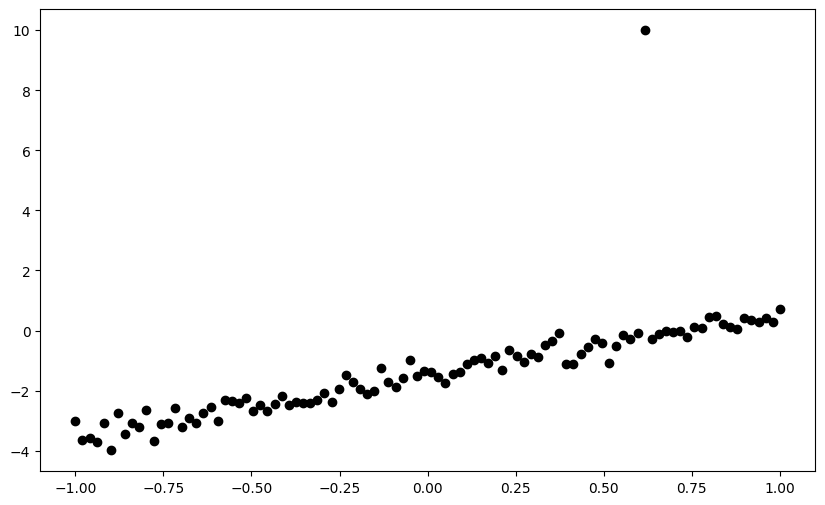

In [8]:
# Regenerate data for reproducibility
np.random.seed(1)
beta = np.array([-1.5, 2.0])
input_range = np.linspace(-1, 1, 100)
X = np.vstack([np.ones(100), input_range]).T
y = X @ beta + np.random.normal(0, 0.3, 100)
y[80] = 10

plt.figure(figsize=(10,6))
plt.scatter(X[:,1], y, color='black', label='Data points')

In [9]:
# Calculate new estimators
beta_hat_gaussian_outlier = calculate_beta_hat(X, y, 'gaussian')
beta_hat_gaussian_old_outlier = beta_ordinary(X,y)
beta_hat_laplacian_outlier = calculate_beta_hat(X, y, 'laplacian')

print("True Coefficients:", beta)
print("Coefficients (Gaussian with minimize) with outlier:", beta_hat_gaussian_outlier)
print("Coefficients (Gaussian closed form) with outlier:", beta_hat_gaussian_old_outlier)
print("Coefficients (Laplacian) with outlier:", beta_hat_laplacian_outlier)

True Coefficients: [-1.5  2. ]
Coefficients (Gaussian with minimize) with outlier: [-1.3784814   2.23687319]
Coefficients (Gaussian closed form) with outlier: [-1.37848139  2.2368733 ]
Coefficients (Laplacian) with outlier: [-1.49766215  2.08258059]


In [10]:
error_gaussian_outlier = np.linalg.norm(beta - beta_hat_gaussian_outlier, ord=2)
error_laplacian_outlier = np.linalg.norm(beta - beta_hat_laplacian_outlier, ord=2)
print("L2 Error of estimators with outlier (Gaussian):", error_gaussian_outlier)
print("L2 Error of estimators with outlier (Laplacian):", error_laplacian_outlier)

L2 Error of estimators with outlier (Gaussian): 0.26622486020169933
L2 Error of estimators with outlier (Laplacian): 0.08261367841483944


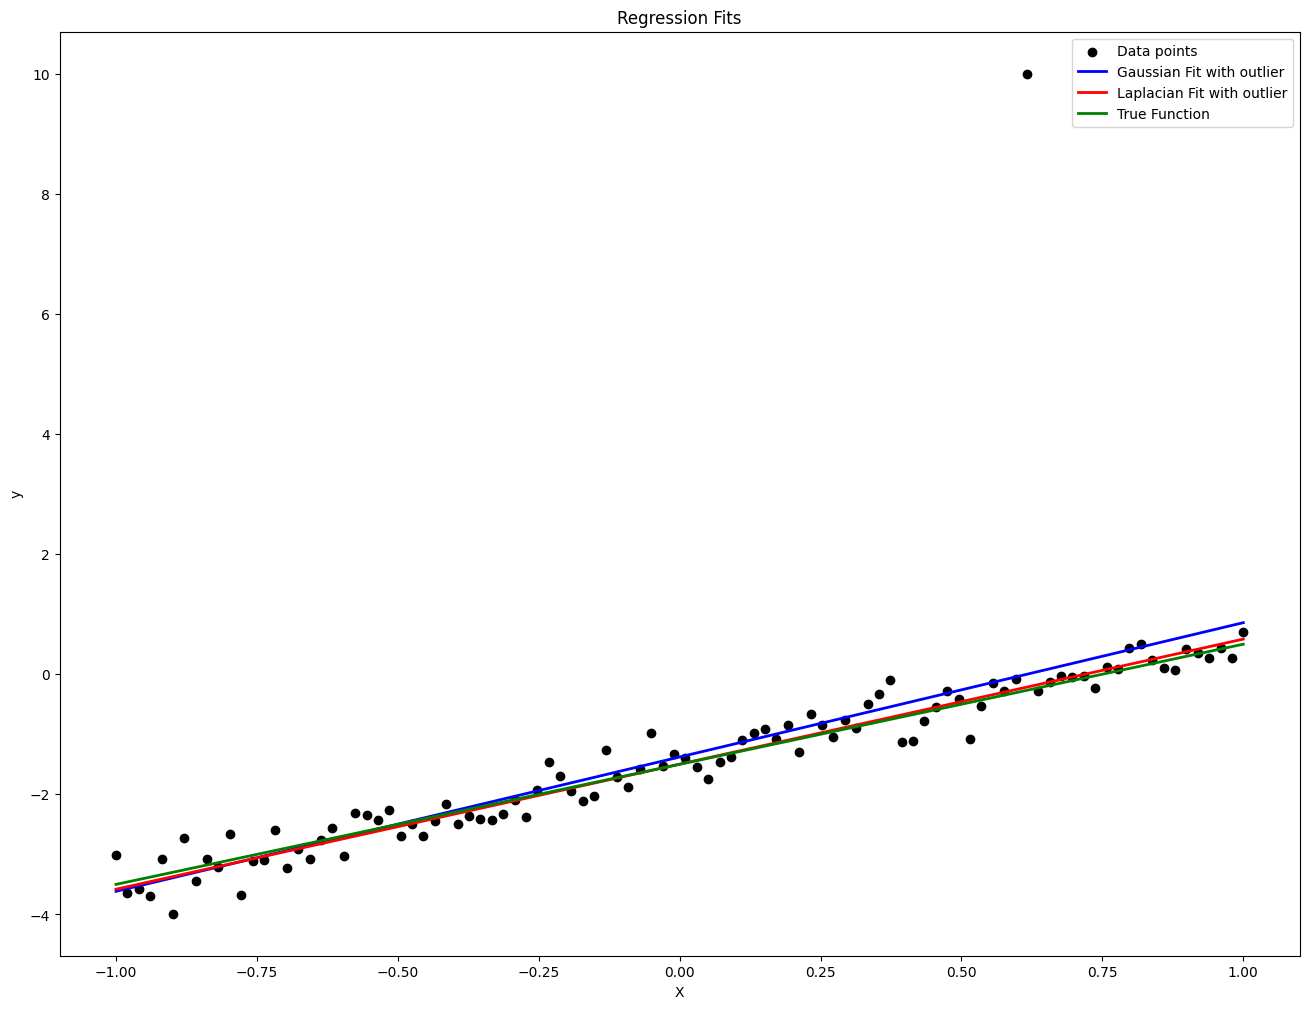

In [11]:
yhat_gaussina_outlier = X @ beta_hat_gaussian_outlier
yhat_laplace_outlier = X @ beta_hat_laplacian_outlier

plt.figure(figsize=(16,12))
plt.scatter(X[:,1], y, color='black', label='Data points')
plt.plot(X[:,1], yhat_gaussina_outlier, color='blue', label='Gaussian Fit with outlier', linewidth=2)
plt.plot(X[:,1], yhat_laplace_outlier, color='red', label='Laplacian Fit with outlier', linewidth=2)
plt.plot(X[:,1], yhat_real, color='green', label='True Function', linewidth=2)
plt.title('Regression Fits')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()